In [1]:
import mysql.connector as sql

In [36]:
db = sql.connect(host='localhost',user='root',password='12ka442ka1',database='hr')

In [40]:
mycursor = db.cursor()

In [42]:
mycursor.execute("SELECT VERSION()")

In [39]:
# TASK 1
query="select locations.city, countries.country_name, countries.country_id from locations join countries on locations.country_id= countries.country_id"
mycursor.execute(query)
data1= mycursor.fetchall()
for x in data1:
    print(x)

('Roma', 'Italy', 'IT')
('Venice', 'Italy', 'IT')
('Tokyo', 'Japan', 'JP')
('Hiroshima', 'Japan', 'JP')
('Southlake', 'United States of America', 'US')
('South San Francisco', 'United States of America', 'US')
('South Brunswick', 'United States of America', 'US')
('Seattle', 'United States of America', 'US')
('Toronto', 'Canada', 'CA')
('Whitehorse', 'Canada', 'CA')
('Beijing', 'China', 'CN')
('Bombay', 'India', 'IN')
('Sydney', 'Australia', 'AU')
('Singapore', 'Singapore', 'SG')
('London', 'United Kingdom', 'UK')
('Oxford', 'United Kingdom', 'UK')
('Stretford', 'United Kingdom', 'UK')
('Munich', 'Germany', 'DE')
('Sao Paulo', 'Brazil', 'BR')
('Geneva', 'Switzerland', 'CH')
('Bern', 'Switzerland', 'CH')
('Utrecht', 'Netherlands', 'NL')
('Mexico City', 'Mexico', 'MX')


In [11]:
# TASK 2
import pandas as pd
emp_data=pd.read_sql_query('select employee_id, first_name, last_name, department_id from employees',db)
print(emp_data)

     employee_id first_name last_name  department_id
0            100     Steven      King           90.0
1            101      Neena   Kochhar           90.0
2            102        Lex   De Haan           90.0
3            103  Alexander    Hunold           60.0
4            104      Bruce     Ernst           60.0
..           ...        ...       ...            ...
102          202        Pat       Fay           20.0
103          203      Susan    Mavris           40.0
104          204    Hermann      Baer           70.0
105          205    Shelley   Higgins          110.0
106          206    William     Gietz          110.0

[107 rows x 4 columns]


In [13]:
loc_data=pd.read_sql_query('select location_id, city, country_id from locations',db)
print(loc_data)

    location_id                 city country_id
0          1000                 Roma         IT
1          1100               Venice         IT
2          1200                Tokyo         JP
3          1300            Hiroshima         JP
4          1400            Southlake         US
5          1500  South San Francisco         US
6          1600      South Brunswick         US
7          1700              Seattle         US
8          1800              Toronto         CA
9          1900           Whitehorse         CA
10         2000              Beijing         CN
11         2100               Bombay         IN
12         2200               Sydney         AU
13         2300            Singapore         SG
14         2400               London         UK
15         2500               Oxford         UK
16         2600            Stretford         UK
17         2700               Munich         DE
18         2800            Sao Paulo         BR
19         2900               Geneva    

In [14]:
dep_data=pd.read_sql_query('select department_id, location_id from departments',db)
print(dep_data)

    department_id  location_id
0              60         1400
1              50         1500
2              10         1700
3              30         1700
4              90         1700
5             100         1700
6             110         1700
7             120         1700
8             130         1700
9             140         1700
10            150         1700
11            160         1700
12            170         1700
13            180         1700
14            190         1700
15            200         1700
16            210         1700
17            220         1700
18            230         1700
19            240         1700
20            250         1700
21            260         1700
22            270         1700
23             20         1800
24             40         2400
25             80         2500
26             70         2700


In [16]:
con_data=pd.read_sql_query('select country_id, country_name from countries',db)
print(con_data)

   country_id              country_name
0          AR                 Argentina
1          AU                 Australia
2          BE                   Belgium
3          BR                    Brazil
4          CA                    Canada
5          CH               Switzerland
6          CN                     China
7          DE                   Germany
8          DK                   Denmark
9          EG                     Egypt
10         FR                    France
11         HK                  HongKong
12         IL                    Israel
13         IN                     India
14         IT                     Italy
15         JP                     Japan
16         KW                    Kuwait
17         MX                    Mexico
18         NG                   Nigeria
19         NL               Netherlands
20         SG                 Singapore
21         UK            United Kingdom
22         US  United States of America
23         ZM                    Zambia


In [17]:
df1=pd.merge(emp_data,dep_data, on='department_id')
df1

,employee_id,first_name,last_name,department_id,location_id
0,100,Steven,King,90.0,1700
1,101,Neena,Kochhar,90.0,1700
2,102,Lex,De Haan,90.0,1700
3,103,Alexander,Hunold,60.0,1400
4,104,Bruce,Ernst,60.0,1400
...,...,...,...,...,...
101,202,Pat,Fay,20.0,1800
102,203,Susan,Mavris,40.0,2400
103,204,Hermann,Baer,70.0,2700
104,205,Shelley,Higgins,110.0,1700


In [19]:
df2=pd.merge(df1,loc_data, on='location_id')
df2

,employee_id,first_name,last_name,department_id,location_id,city,country_id
0,100,Steven,King,90.0,1700,Seattle,US
1,101,Neena,Kochhar,90.0,1700,Seattle,US
2,102,Lex,De Haan,90.0,1700,Seattle,US
3,108,Nancy,Greenberg,100.0,1700,Seattle,US
4,109,Daniel,Faviet,100.0,1700,Seattle,US
...,...,...,...,...,...,...,...
101,179,Charles,Johnson,80.0,2500,Oxford,UK
102,201,Michael,Hartstein,20.0,1800,Toronto,CA
103,202,Pat,Fay,20.0,1800,Toronto,CA
104,203,Susan,Mavris,40.0,2400,London,UK


In [21]:
df=pd.merge(df2,con_data,on ='country_id')
df

,employee_id,first_name,last_name,department_id,location_id,city,country_id,country_name
0,100,Steven,King,90.0,1700,Seattle,US,United States of America
1,101,Neena,Kochhar,90.0,1700,Seattle,US,United States of America
2,102,Lex,De Haan,90.0,1700,Seattle,US,United States of America
3,108,Nancy,Greenberg,100.0,1700,Seattle,US,United States of America
4,109,Daniel,Faviet,100.0,1700,Seattle,US,United States of America
...,...,...,...,...,...,...,...,...
101,179,Charles,Johnson,80.0,2500,Oxford,UK,United Kingdom
102,203,Susan,Mavris,40.0,2400,London,UK,United Kingdom
103,201,Michael,Hartstein,20.0,1800,Toronto,CA,Canada
104,202,Pat,Fay,20.0,1800,Toronto,CA,Canada


In [44]:
from sqlalchemy import create_engine
hostname="localhost"
dbname="hr"
uname="root"
pwd="12ka442ka1"
engine= create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host="localhost",db="hr",user="root",pw="12ka442ka1"))
df.to_sql('emp_info',engine)

ValueError: Table 'emp_info' already exists.

In [24]:
# TASK 3
import matplotlib.pyplot as plt
df3=df.groupby(by='country_name')['employee_id'].count()
df3

country_name
Canada                       2
Germany                      1
United Kingdom              35
United States of America    68
Name: employee_id, dtype: int64

Text(0.5, 1.0, 'Country-wise Distribution of employees')

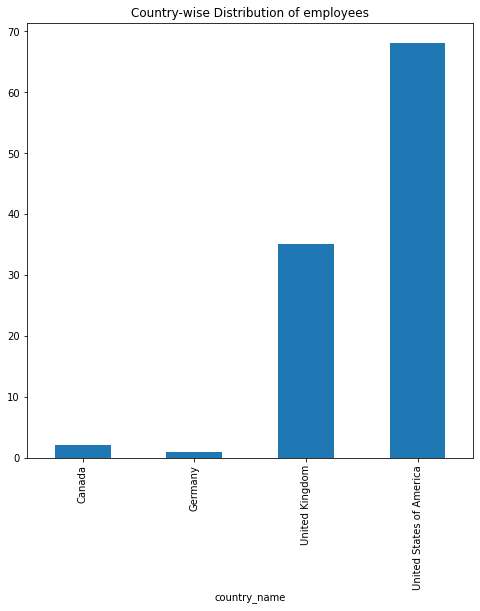

In [27]:
df3.plot(kind='bar',figsize=(8,8))
plt.title('Country-wise Distribution of employees')

In [28]:
df4=df.groupby(by='city')['employee_id'].count()
df4

city
London                  1
Munich                  1
Oxford                 34
Seattle                18
South San Francisco    45
Southlake               5
Toronto                 2
Name: employee_id, dtype: int64

Text(0.5, 1.0, 'City-wise Employee Distribution')

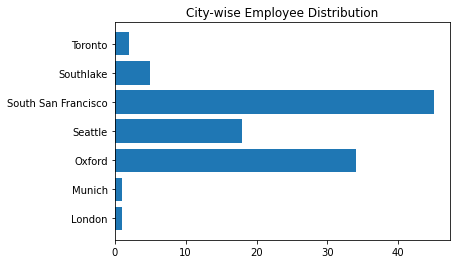

In [30]:
plt.barh(df4.index,df4.values)
plt.title('City-wise Employee Distribution')

In [45]:
db = sql.connect(host='localhost',user='root',password='12ka442ka1',database='hr')

In [46]:
mycursor = db.cursor()

In [48]:
query1="select country_name , count(employee_id) from emp_info group by country_name"
mycursor.execute(query1)
data1=mycursor.fetchall()
data1

[('United States of America', 68),
 ('United Kingdom', 35),
 ('Canada', 2),
 ('Germany', 1)]

In [ ]:
query1="select city , count(employee_id) from emp_info group by country_name"
mycursor.execute(query1)
data1=mycursor.fetchall()
data1